In [1]:
import paths
import numpy as np
import h5py
from sdfs.geom_mrst import geom_plot, GeomMRST

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
plt.rc('text', usetex=True)
plt.rc('image', cmap='coolwarm')

In [4]:
geom_filename = '../data/geom_1x.mat'
geom = GeomMRST(geom_filename)

In [5]:
with h5py.File('../data/hanford_data_100_uncond.h5','r') as f:
    xi_ens   = f['xi_ens'][:]
    ytms_ens = f['ytms_ens'][:]
    u_ens    = f['u_ens'][:]
    yref     = f['yref'][:]
    ypred    = f['ypred'][:]
    Psi_y    = f['Psi_y'][:]
    ytm      = f['ytm'][()]
    Nens     = f['Nens'][()]
    Nxi      = f['Nxi'][()]

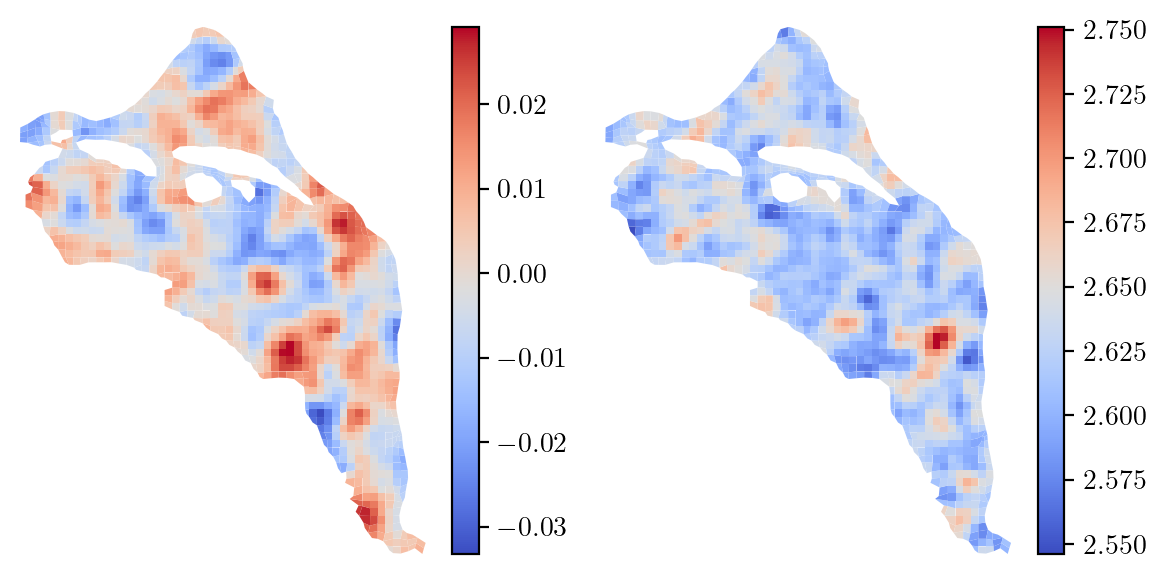

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
# Mean
plot = geom_plot(geom, np.mean(ytms_ens, axis=0) - ypred, ax[0])
ax[0].set_aspect('equal')
ax[0].axis('off')
ax[0].autoscale(tight=True)
fig.colorbar(plot, ax=ax[0])
fig.tight_layout()
# Var
plot = geom_plot(geom, np.var(ytms_ens, axis=0, ddof=1), ax[1])
ax[1].set_aspect('equal')
ax[1].axis('off')
ax[1].autoscale(tight=True)
fig.colorbar(plot, ax=ax[1])
fig.tight_layout()

Set i	Max(Var[iyobs[i]])
1	2.110200e-14
2	5.357982e-14
3	3.567065e-14
4	4.708803e-14
5	1.671314e-13
6	3.834731e-14
7	2.985507e-14
8	2.507219e-14
9	1.207551e-14
10	1.677208e-14


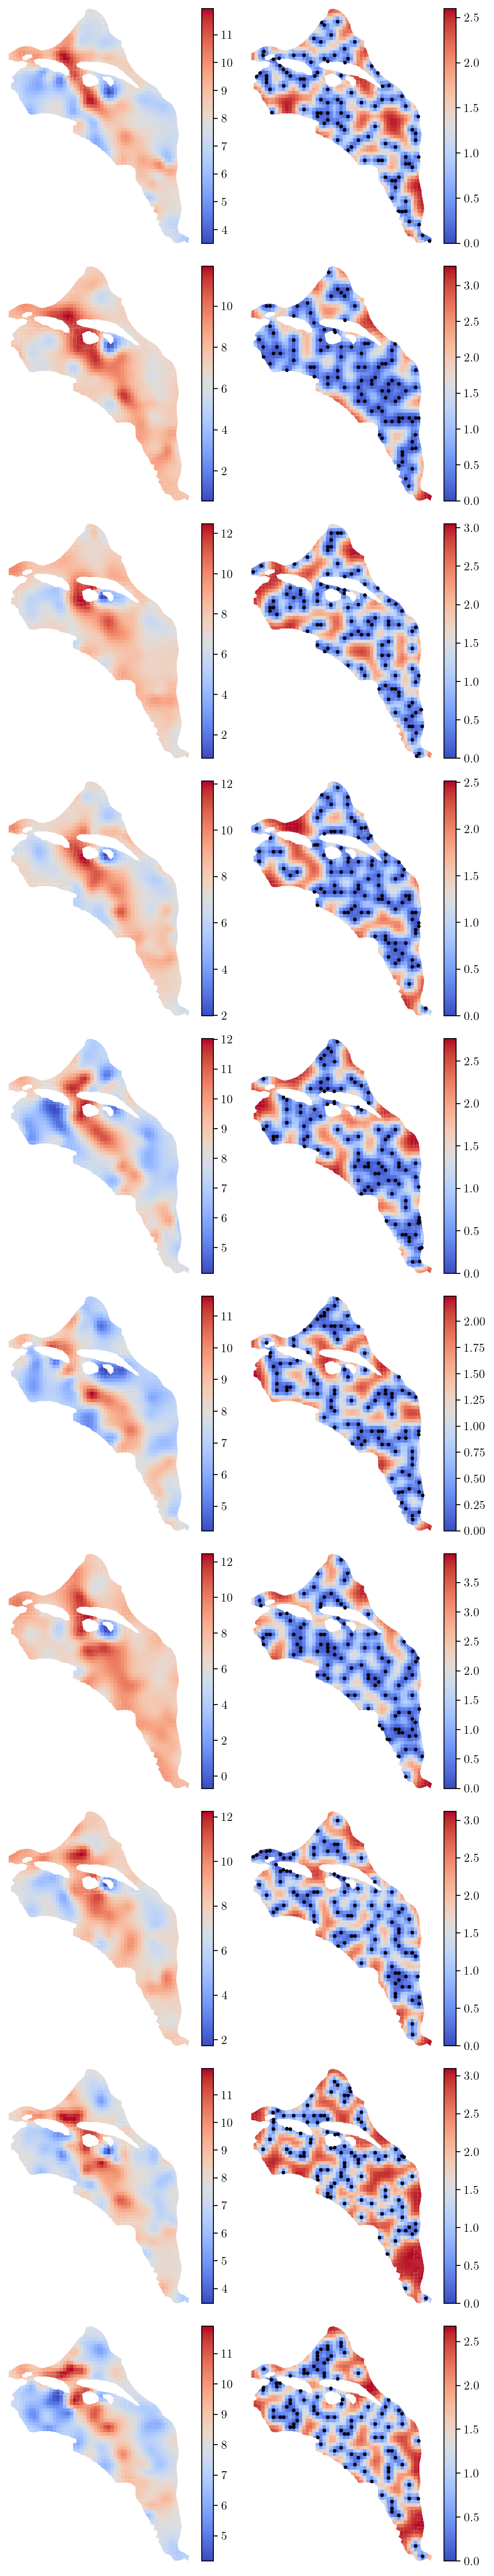

In [7]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(6, 30))
print('Set i\tMax(Var[iyobs[i]])')
for i in range(10):
    with h5py.File('../data/hanford_data_100_cond.h5','r') as f:
        ytms_ens = f[f't{i:d}/ytms_ens'][:]
        iyobs    = f[f't{i:d}/iyobs'][:]
    # Mean
    plot = geom_plot(geom, ytm + np.mean(ytms_ens, axis=0), ax[i, 0])
    ax[i, 0].set_aspect('equal')
    ax[i, 0].axis('off')
    ax[i, 0].autoscale(tight=True)
    fig.colorbar(plot, ax=ax[i, 0])
    # Var
    var  = np.var(ytms_ens, axis=0, ddof=1)
    plot = geom_plot(geom, var, ax[i, 1])
    ax[i, 1].plot(geom.cells.centroids[0, iyobs[i]], geom.cells.centroids[1, iyobs[i]], 'ko', markersize=2)
    ax[i, 1].set_aspect('equal')
    ax[i, 1].axis('off')
    ax[i, 1].autoscale(tight=True)
    fig.colorbar(plot, ax=ax[i, 1])
    print(f'{i + 1:d}\t{np.max(var[iyobs[i]]):.6e}')
fig.tight_layout()